In [4]:
import pandas as pd
import numpy as nm

In [6]:
df=pd.read_csv('mobile_price.csv')
df.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [8]:
df=df.dropna()
print(df.describe())

       battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.00000

In [10]:
print(df.columns)

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


In [12]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [16]:
from sklearn.impute import SimpleImputer

In [18]:
imputer=SimpleImputer(strategy='mean')
data_imputed=imputer.fit_transform(df)

In [20]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df.drop(columns='price_range'))
data_scaled = pd.DataFrame(data_scaled, columns=df.drop(columns='price_range').columns)

## Analyze the data using visualization

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

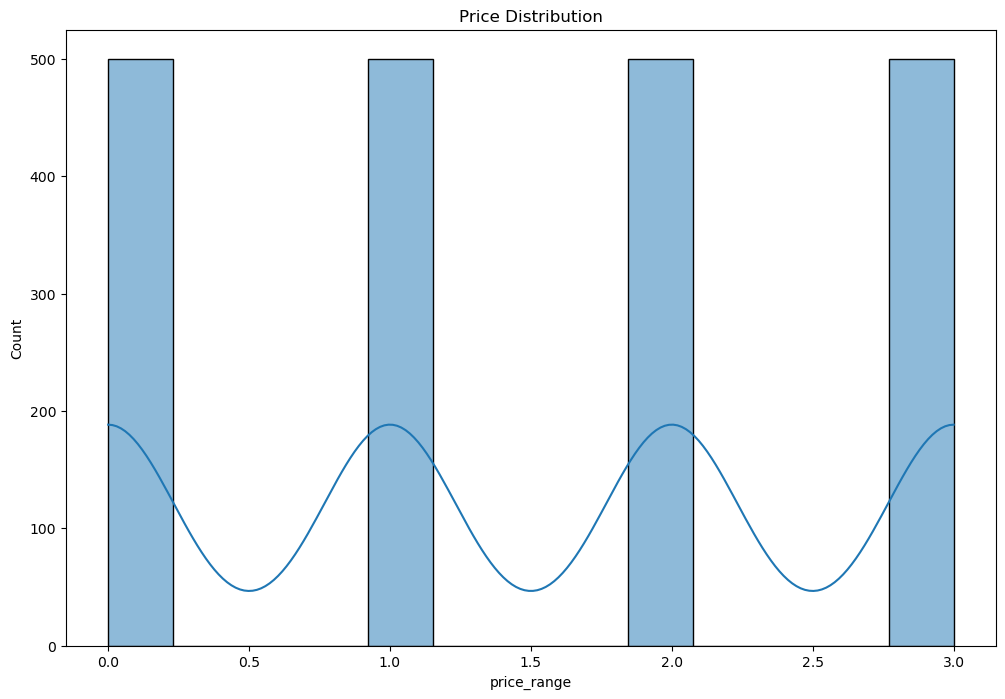

In [27]:
plt.figure(figsize=(12, 8))
sns.histplot(df['price_range'], kde=True)
plt.title('Price Distribution')
plt.show()

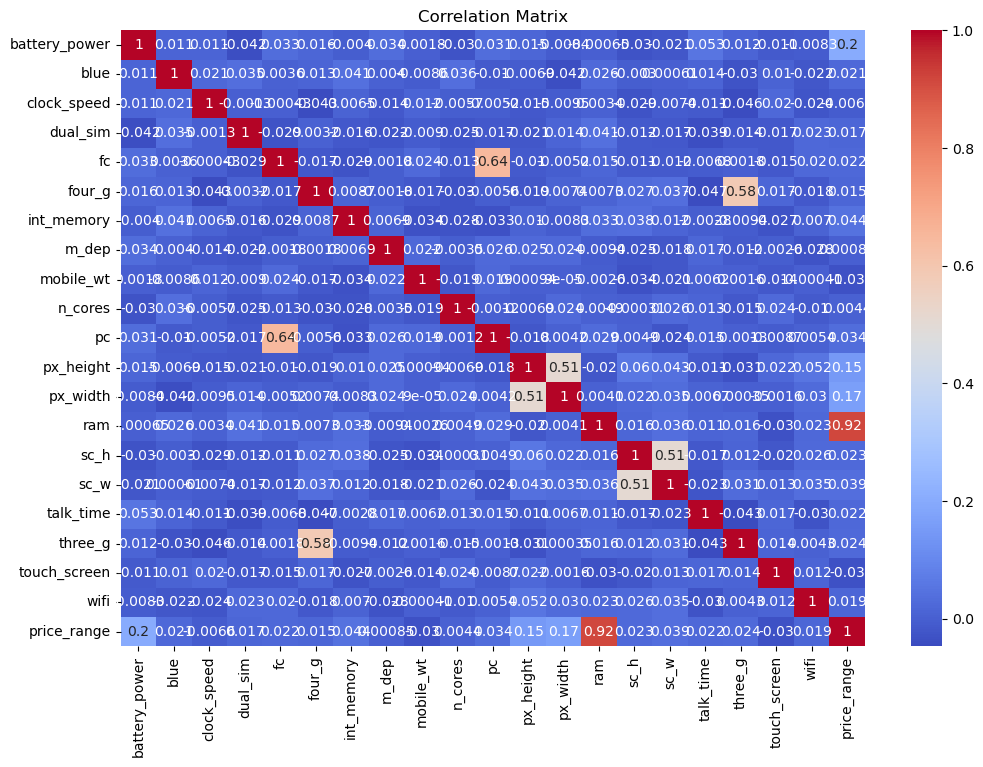

In [29]:
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [31]:
from sklearn.ensemble import RandomForestClassifier

## training the forest model

In [34]:
data_scaled['price_range'] = df['price_range']
X = data_scaled.drop(columns='price_range')
y = data_scaled['price_range']

In [36]:
model = RandomForestClassifier(random_state=42) 
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [38]:
importances = model.feature_importances_
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)
print(feature_importances)

          feature  importance
13            ram    0.494163
0   battery_power    0.074602
12       px_width    0.057448
11      px_height    0.055640
8       mobile_wt    0.038960
6      int_memory    0.034699
16      talk_time    0.030347
15           sc_w    0.027892
10             pc    0.027459
14           sc_h    0.026547
2     clock_speed    0.026069
4              fc    0.024274
7           m_dep    0.023293
9         n_cores    0.022036
18   touch_screen    0.006620
3        dual_sim    0.006448
1            blue    0.006312
19           wifi    0.006255
5          four_g    0.006237
17        three_g    0.004702


## model selection

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
models = {
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{name} Model:')
    print(classification_report(y_test, y_pred))

SVM Model:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       105
           1       0.80      0.89      0.84        91
           2       0.84      0.82      0.83        92
           3       0.96      0.92      0.94       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400

Random Forest Model:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       105
           1       0.85      0.82      0.84        91
           2       0.78      0.85      0.81        92
           3       0.94      0.88      0.91       112

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400

Decision Tree Model:
              precision    recall  f1-score   support

           0       0.9

## model tuning

In [48]:
from sklearn.model_selection import GridSearchCV

In [50]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [52]:
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print('Best Parameters:', grid_search.best_params_)

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


## prediction

In [62]:
battery_power = 1500
blue = 1
clock_speed = 2.3
dual_sim = 1
fc = 10
four_g = 1
int_memory = 32
m_dep = 0.5
mobile_wt = 150
n_cores = 4
pc = 13
px_height = 1280
px_width = 720
ram = 4000
sc_h = 15
sc_w = 7
talk_time = 20
three_g = 1
touch_screen = 1
wifi = 1
price_range = 2

new_data = pd.DataFrame({
    'battery_power': [battery_power],
    'blue': [blue],
    'clock_speed': [clock_speed],
    'dual_sim': [dual_sim],
    'fc': [fc],
    'four_g': [four_g],
    'int_memory': [int_memory],
    'm_dep': [m_dep],
    'mobile_wt': [mobile_wt],
    'n_cores': [n_cores],
    'pc': [pc],
    'px_height': [px_height],
    'px_width': [px_width],
    'ram': [ram],
    'sc_h': [sc_h],
    'sc_w': [sc_w],
    'talk_time': [talk_time],
    'three_g': [three_g],
    'touch_screen': [touch_screen],
    'wifi': [wifi]
})

# Preprocess new data
new_data_scaled = scaler.transform(new_data)
price_prediction = best_model.predict(new_data_scaled)
print('Predicted Price Category:', price_prediction)

Predicted Price Category: [3]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
